In [1]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np

In [2]:
os.path.join('train.csv')

'train.csv'

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

id                                       comment_text  toxic  \
0  0000997932d777bf  Explanation\nWhy the edits made under my usern...      0   
1  000103f0d9cfb60f  D'aww! He matches this background colour I'm s...      0   
2  000113f07ec002fd  Hey man, I'm really not trying to edit war. It...      0   
3  0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...      0   
4  0001d958c54c6e35  You, sir, are my hero. Any chance you remember...      0   

   severe_toxic  obscene  threat  insult  identity_hate  
0             0        0       0       0              0  
1             0        0       0       0              0  
2             0        0       0       0              0  
3             0        0       0       0              0  
4             0        0       0       0              0

In [5]:
df.tail()

id                                       comment_text  \
159566  ffe987279560d7ff  ":::::And for the second time of asking, when ...   
159567  ffea4adeee384e90  You should be ashamed of yourself \n\nThat is ...   
159568  ffee36eab5c267c9  Spitzer \n\nUmm, theres no actual article for ...   
159569  fff125370e4aaaf3  And it looks like it was actually you who put ...   
159570  fff46fc426af1f9a  "\nAnd ... I really don't think you understand...   

        toxic  severe_toxic  obscene  threat  insult  identity_hate  
159566      0             0        0       0       0              0  
159567      0             0        0       0       0              0  
159568      0             0        0       0       0              0  
159569      0             0        0       0       0              0  
159570      0             0        0       0       0              0

In [6]:
df.iloc[0]

id                                                0000997932d777bf
comment_text     Explanation\nWhy the edits made under my usern...
toxic                                                            0
severe_toxic                                                     0
obscene                                                          0
threat                                                           0
insult                                                           0
identity_hate                                                    0
Name: 0, dtype: object

In [7]:
df.iloc[7]['comment_text']

"Your vandalism to the Matt Shirvington article has been reverted.  Please don't do it again, or you will be banned."

In [8]:
df[df.columns[2:]].iloc[5]

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
Name: 5, dtype: int64

In [9]:
from tensorflow.keras.layers import TextVectorization

In [10]:
X = df['comment_text']
y = df[df.columns[2:]].values

In [11]:
df.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate'],
      dtype='object')

In [12]:
df[df.columns[2:]].values

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [13]:
MAX_FEATURES = 500000 #number of words in the vocab

In [14]:
vectorizer = TextVectorization(max_tokens=MAX_FEATURES,
                               output_sequence_length=2000,
                               output_mode='int')

In [15]:
vectorizer.adapt(X.values)

In [16]:
vectorized_text = vectorizer(X.values)

In [17]:
vectorized_text

<tf.Tensor: shape=(159571, 2000), dtype=int64, numpy=
array([[   643,     76,      2, ...,      0,      0,      0],
       [216259,     54,   2506, ...,      0,      0,      0],
       [   425,    440,     70, ...,      0,      0,      0],
       ...,
       [ 32141,   7329,    383, ...,      0,      0,      0],
       [     5,     12,    533, ...,      0,      0,      0],
       [     5,      8,    130, ...,      0,      0,      0]], dtype=int64)>

In [18]:
#MCSHBAP - map,cache, shuffle, batch, prefetch from_tensor_slices
dataset = tf.data.Dataset.from_tensor_slices((vectorized_text,y))
dataset = dataset.cache()
dataset = dataset.shuffle(160000)
dataset = dataset.batch(16)
dataset = dataset.prefetch(8)

In [19]:
batch_X, batch_y = dataset.as_numpy_iterator().next()

In [20]:
int(len(dataset)*.7)

6981

In [21]:
train = dataset.take(int(len(dataset)*.7))
val = dataset.skip(int(len(dataset)*.7)).take(int(len(dataset)*.2))
test = dataset.skip(int(len(dataset)*.9)).take(int(len(dataset)*.1))


In [22]:
train_generator = train.as_numpy_iterator()

In [23]:
train_generator.next()

(array([[  362,    85,     8, ...,     0,     0,     0],
        [   57,   498,   197, ...,     0,     0,     0],
        [71942,     0,     0, ...,     0,     0,     0],
        ...,
        [  124,     7,    13, ...,     0,     0,     0],
        [   39,     8,   457, ...,     0,     0,     0],
        [   41,     9,    49, ...,     0,     0,     0]], dtype=int64),
 array([[0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0]], dtype=int64))

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Bidirectional, Dense, Embedding

In [25]:
model = Sequential()
# create the embedding layer
model.add(Embedding(MAX_FEATURES+1, 32))
# Bidirectional LSTM Layer
model.add(Bidirectional(LSTM(32, activation='tanh')))
# Feature extractor Dully connected Layers
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
# Final Layer
model.add(Dense(6, activation='sigmoid'))


In [26]:
model.compile(loss='BinaryCrossentropy', optimizer='Adam')

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 32)          16000032  
                                                                 
 bidirectional (Bidirectiona  (None, 64)               16640     
 l)                                                              
                                                                 
 dense (Dense)               (None, 128)               8320      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 6)                 774       
                                                        

In [28]:
history = model.fit(train, epochs=1, validation_data=val)

6981/6981 [==============================] - 4835s 692ms/step - loss: 0.0631 - val_loss: 0.0430


In [30]:
history.history

{'loss': [0.0631491094827652], 'val_loss': [0.043002061545848846]}

In [32]:
from matplotlib import pyplot as plt

<Figure size 576x360 with 0 Axes>

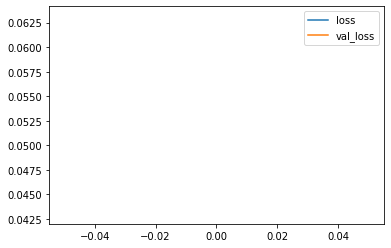

In [33]:
plt.figure(figsize=(8,5))
pd.DataFrame(history.history).plot()
plt.show()

In [47]:
input_text = vectorizer('You freaking suck! I am hit you')

In [48]:
batch = test.as_numpy_iterator().next()

In [49]:
df.columns[2:]

Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
       'identity_hate'],
      dtype='object')

In [52]:
batch_X, batch_y = test.as_numpy_iterator().next()

In [56]:
batch_y

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 1],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]], dtype=int64)

In [54]:
(model.predict(batch_X) > 0.5)

1/1 [==============================] - 0s 118ms/step


array([[False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [ True, False,  True, False,  True, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False],
       [False, False, False, False, False, False]])

In [55]:
res = model.predict(np.expand_dims(input_text,0))

1/1 [==============================] - 0s 105ms/step


In [58]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [59]:
pre = Precision()
re = Recall()
acc = CategoricalAccuracy()

In [60]:
for batch in test.as_numpy_iterator():
    X_true, y_true = batch
    yhat = model.predict(X_true)
    
    y_true = y_true.flatten()
    yhat = yhat.flatten()
    
    pre.update_state(y_true, yhat)
    re.update_state(y_true, yhat)
    acc.update_state(y_true, yhat)
    

1/1 [==============================] - 0s 98ms/step


In [61]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision: 0.8690614104270935, Recall:0.6559766530990601, Accuracy:0.4774323105812073


In [64]:
model.save('toxicity.h5')